In [1]:
# %matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.stats as st
from scipy.stats import linregress

# import gmaps
# from config import g_key

# Must enable gmaps extension to display interactive gmaps in jupyter notebook
# jupyter nbextension enable --py gmaps

In [3]:
# Data filepaths
per_cap_data_filepath = "../data_raw/Per Capita Alcohol Consumption 1977_2018.csv"
niaaa_data_filepath = "../data_clean/niaaa_data_normalized_correct_values.csv"
raw_data_filepath1 = "../data_raw/cdc_1990_1999_state_year_age.csv"
raw_data_filepath2 = "../data_raw/cdc_2000_2009_state_year_age.csv"
raw_data_filepath3 = "../data_raw/cdc_2010_2019_state_year_age.csv"
state_consumption_path = "../data_clean/per_capita_consumption_states_1977_2018_clean.csv"
niaaa_data_filepath = "../data_clean/niaaa_data_normalized_correct_values.csv"

In [4]:
per_capita_df = pd.read_csv(per_cap_data_filepath, delimiter=",")
per_capita_df

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879156,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667
...,...,...,...,...,...,...,...,...,...,...
2347,us total,1981,1.39,0.35,1.02,2.76,329.481481,69.457364,211.776156,588.800000
2348,us total,1980,1.37,0.34,1.04,2.75,324.740741,67.472868,215.928629,586.666667
2349,us total,1979,1.34,0.31,1.04,2.70,317.629630,61.519380,215.928629,576.000000
2350,us total,1978,1.30,0.30,1.05,2.66,308.148148,59.534884,218.004866,567.466667


In [5]:
per_capita_df.columns = ['State', 
                         'Year', 
                         'Beer (Ethanol Gallons Per Capita)', 
                         'Wine (Ethanol Gallons Per Capita)', 
                         'Spirit (Ethanol Gallons Per Capita)', 
                         'All Drinks (Ethanol Gallons Per Capita)', 
                         'Number of Beers', 
                         'Number of Glasses of Wine', 
                         'Number of Shots Liquor', 
                         'Total Number of Drinks']

print(list(per_capita_df.columns.values))

per_capita_df.sort_values(['State','Year'], inplace=True)
per_capita_df

['State', 'Year', 'Beer (Ethanol Gallons Per Capita)', 'Wine (Ethanol Gallons Per Capita)', 'Spirit (Ethanol Gallons Per Capita)', 'All Drinks (Ethanol Gallons Per Capita)', 'Number of Beers', 'Number of Glasses of Wine', 'Number of Shots Liquor', 'Total Number of Drinks']


,State,Year,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
41,alabama,1977,0.97,0.12,0.82,1.92,229.925926,23.813953,170.251419,409.600000
40,alabama,1978,0.95,0.12,0.85,1.92,225.185185,23.813953,176.480130,409.600000
39,alabama,1979,0.96,0.12,0.82,1.90,227.555556,23.813953,170.251419,405.333333
38,alabama,1980,0.95,0.16,0.74,1.86,225.185185,31.751938,153.641525,396.800000
37,alabama,1981,1.00,0.19,0.73,1.91,237.037037,37.705426,151.565288,407.466667
...,...,...,...,...,...,...,...,...,...,...
2104,wyoming,2014,1.26,0.31,1.16,2.73,298.666667,61.519380,240.843471,582.400000
2103,wyoming,2015,1.25,0.31,1.18,2.74,296.296296,61.519380,244.995945,584.533333
2102,wyoming,2016,1.18,0.32,1.17,2.68,279.703704,63.503876,242.919708,571.733333
2101,wyoming,2017,1.17,0.32,1.19,2.68,277.333333,63.503876,247.072182,571.733333


In [6]:
states_regions = per_capita_df['State'].unique()
states_regions

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'midwest region', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'north dakota', 'northeast region', 'ohio',
       'oklahoma', 'oregon', 'pennsylvania', 'rhode island',
       'south carolina', 'south dakota', 'south region', 'tennessee',
       'texas', 'us total', 'utah', 'vermont', 'virginia', 'washington',
       'west region', 'west virginia', 'wisconsin', 'wyoming'],
      dtype=object)

In [7]:
totals = ['us total']

regions = ['northeast region', 'midwest region', 'south region', 'west region']

states = ['alabama', 'alaska', 'arizona', 'arkansas', 'california',
          'colorado', 'connecticut', 'delaware', 'district of columbia',
          'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
          'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
          'massachusetts', 'michigan', 'minnesota', 'mississippi',
          'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire',
          'new jersey', 'new mexico', 'new york', 'north carolina',
          'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
          'rhode island', 'south carolina', 'south dakota', 'tennessee',
          'texas', 'utah', 'vermont', 'virginia', 'washington',
          'west virginia', 'wisconsin', 'wyoming']

len(states)

51

States in each region per data source (NIAAA):

Northeast Region
(CT, ME, MA, NH, NJ, NY, PA, RI, VT)

Midwest Region
(IL, IN, IA, KS, MI, MN, MO, NE, ND, OH, SD, WI)

South Region
(AL, AR, DE, DC, FL, GA, KY, LA, MD, MS, NC, OK, SC, TN, TX, VA, WV)

West Region
(AK, AZ, CA, CO, HI, ID, MT, NV, NM, OR, UT, WA, WY)

In [8]:
years = per_capita_df['Year'].unique()
years.sort()
years
len(years)

42

In [9]:
# Break out US totals

totals_1977_2018_df = per_capita_df[per_capita_df['State'].isin(totals)]
us_totals_df = totals_1977_2018_df.set_index(['Year']).sort_index(ascending=True)

print(us_totals_df.count())
us_totals_df.head()

State                                      42
Beer (Ethanol Gallons Per Capita)          42
Wine (Ethanol Gallons Per Capita)          42
Spirit (Ethanol Gallons Per Capita)        42
All Drinks (Ethanol Gallons Per Capita)    42
Number of Beers                            42
Number of Glasses of Wine                  42
Number of Shots Liquor                     42
Total Number of Drinks                     42
dtype: int64


,State,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
Year,,,,,,,,,
1977,us total,1.27,0.29,1.04,2.60,301.037037,57.550388,215.928629,554.666667
1978,us total,1.30,0.30,1.05,2.66,308.148148,59.534884,218.004866,567.466667
1979,us total,1.34,0.31,1.04,2.70,317.629630,61.519380,215.928629,576.000000
1980,us total,1.37,0.34,1.04,2.75,324.740741,67.472868,215.928629,586.666667
1981,us total,1.39,0.35,1.02,2.76,329.481481,69.457364,211.776156,588.800000


In [10]:
# Break out Region Totals

regions_df = per_capita_df[per_capita_df['State'].isin(regions)].reset_index(drop=True)

print(regions_df.count())
regions_df.head()

State                                      168
Year                                       168
Beer (Ethanol Gallons Per Capita)          168
Wine (Ethanol Gallons Per Capita)          168
Spirit (Ethanol Gallons Per Capita)        168
All Drinks (Ethanol Gallons Per Capita)    168
Number of Beers                            168
Number of Glasses of Wine                  168
Number of Shots Liquor                     168
Total Number of Drinks                     168
dtype: int64


,State,Year,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
0,midwest region,1977,1.32,0.21,0.96,2.49,312.888889,41.674419,199.318735,531.200000
1,midwest region,1978,1.35,0.22,0.95,2.52,320.000000,43.658915,197.242498,537.600000
2,midwest region,1979,1.40,0.23,0.95,2.58,331.851852,45.643411,197.242498,550.400000
3,midwest region,1980,1.42,0.24,0.96,2.63,336.592593,47.627907,199.318735,561.066667
4,midwest region,1981,1.42,0.26,0.93,2.61,336.592593,51.596899,193.090024,556.800000


In [11]:
# Break out State Totals

states_df = per_capita_df[per_capita_df['State'].isin(states)].reset_index(drop=True)

print(states_df.count())
states_df

State                                      2142
Year                                       2142
Beer (Ethanol Gallons Per Capita)          2142
Wine (Ethanol Gallons Per Capita)          2142
Spirit (Ethanol Gallons Per Capita)        2142
All Drinks (Ethanol Gallons Per Capita)    2142
Number of Beers                            2142
Number of Glasses of Wine                  2142
Number of Shots Liquor                     2142
Total Number of Drinks                     2142
dtype: int64


,State,Year,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
0,alabama,1977,0.97,0.12,0.82,1.92,229.925926,23.813953,170.251419,409.600000
1,alabama,1978,0.95,0.12,0.85,1.92,225.185185,23.813953,176.480130,409.600000
2,alabama,1979,0.96,0.12,0.82,1.90,227.555556,23.813953,170.251419,405.333333
3,alabama,1980,0.95,0.16,0.74,1.86,225.185185,31.751938,153.641525,396.800000
4,alabama,1981,1.00,0.19,0.73,1.91,237.037037,37.705426,151.565288,407.466667
...,...,...,...,...,...,...,...,...,...,...
2137,wyoming,2014,1.26,0.31,1.16,2.73,298.666667,61.519380,240.843471,582.400000
2138,wyoming,2015,1.25,0.31,1.18,2.74,296.296296,61.519380,244.995945,584.533333
2139,wyoming,2016,1.18,0.32,1.17,2.68,279.703704,63.503876,242.919708,571.733333
2140,wyoming,2017,1.17,0.32,1.19,2.68,277.333333,63.503876,247.072182,571.733333


In [12]:
# OUTPUT CLEAN DATASETS TO .CSV

# US TOTALS 1977-2018
totals_output_path = "../data_clean/per_capita_consumption_us_totals_1977_2018_clean.csv"
us_totals_df.to_csv(totals_output_path)

# REGIONS 1977-2018
regions_output_path = "../data_clean/per_capita_consumption_regions_1977_2018_clean.csv"
regions_df.to_csv(regions_output_path)

# STATES 1977-2018
states_output_path = "../data_clean/per_capita_consumption_states_1977_2018_clean.csv"
states_df.to_csv(states_output_path)

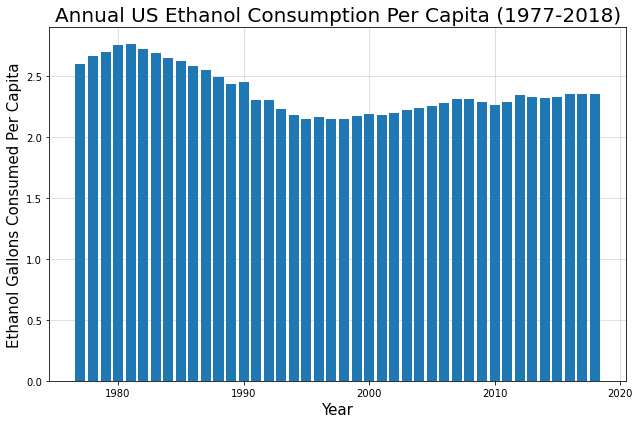

In [13]:
title = 'Annual US Ethanol Consumption Per Capita (1977-2018)'

y_gallons = totals_1977_2018_df['All Drinks (Ethanol Gallons Per Capita)']

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
ax0 = plt.bar(years, y_gallons, zorder=3)

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save above plotted figure as .png
# plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')
# fig0 = ax0.get_figure()
# fig0.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

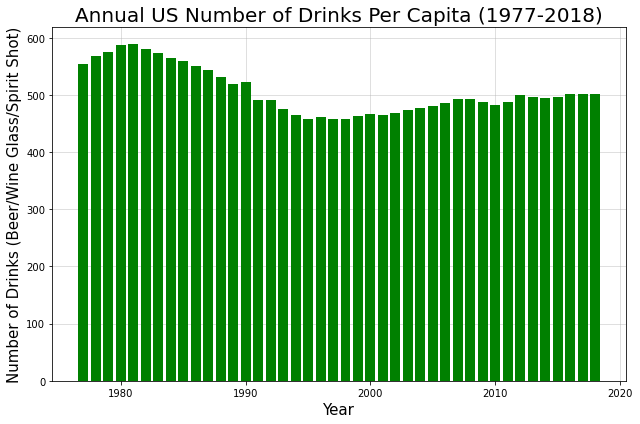

In [14]:
title = 'Annual US Number of Drinks Per Capita (1977-2018)'

y_drinks = totals_1977_2018_df['Total Number of Drinks']

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
plt.bar(years, y_drinks, zorder=3, color='green')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Drinks (Beer/Wine Glass/Spirit Shot)', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save above plotted figure as .png
# plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

* Creating US number of drinks per capita bar chart was mainly to check for any visible differences to US ethanol consumption per capita bar graph.
* Total volume numbers were 

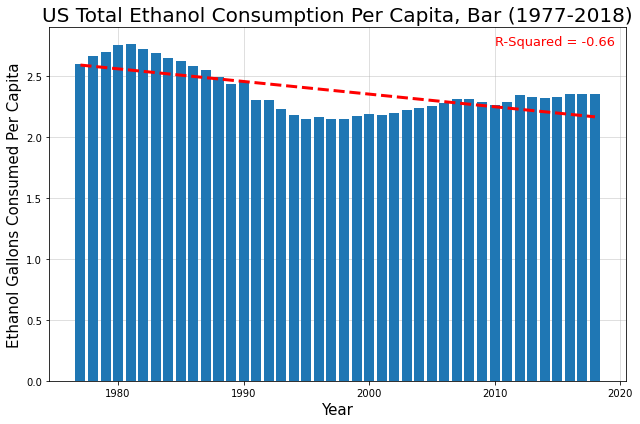

In [15]:
title = 'US Total Ethanol Consumption Per Capita, Bar (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
plt.bar(years, y_gallons, zorder=3)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, y_gallons)
regress_values = years * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Calculate R-squared
correlation = st.pearsonr(years, y_gallons)
r_squared = round(correlation[0], 2)

# Plot linear regression
plt.plot(years, regress_values, 'red', lw=3, ls='--', zorder=3)

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Annotate
plt.annotate(f'R-Squared = {r_squared}', (2010,2.75), color="red", fontsize=13)

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

* The R-squared value is -0.66 which tells us there is moderate correlation between time and alcohol consumption. The negative value means consumption per capita has decreased over between 1977 to 2018. 
* The correlation is not strong enough to indicate causation, but this does verify a decrease in consumption per capita in recent decades.
* A variety of factors such as health studies/education, economic factors, or laws related to alcohol or other recreational drugs may all play roles in the decreased alcohol consumption per capita. However, we cannot determine causation with any certainty based on the consumption data alone.

In [16]:
print(regions)

ne_reg = regions_df.loc[regions_df['State']=='northeast region']
mw_reg = regions_df.loc[regions_df['State']=='midwest region']
s_reg = regions_df.loc[regions_df['State']=='south region']
w_reg = regions_df.loc[regions_df['State']=='west region']

['northeast region', 'midwest region', 'south region', 'west region']


# Alcohol Type Consumption Comparison

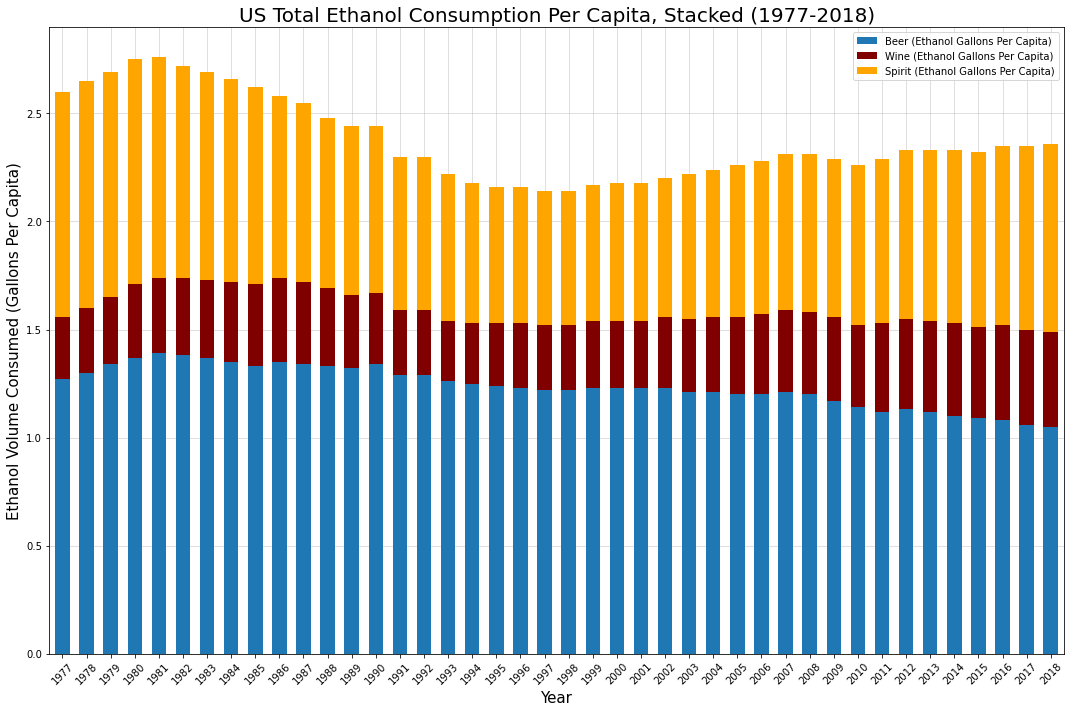

In [17]:
title_ax1 = 'US Total Ethanol Consumption Per Capita, Stacked (1977-2018)'

color = {'Beer (Ethanol Gallons Per Capita)': 'tab:blue', 
         'Wine (Ethanol Gallons Per Capita)': 'maroon', 
         'Spirit (Ethanol Gallons Per Capita)': 'orange'}

type_gallons = ['Beer (Ethanol Gallons Per Capita)', 
                'Wine (Ethanol Gallons Per Capita)', 
                'Spirit (Ethanol Gallons Per Capita)']

# Plot
ax1 = us_totals_df[type_gallons].plot.bar(stacked=True, align='center', rot=45, width=0.6, 
                                          color=color, figsize=(15,10), grid=True, zorder=3)

# Label
plt.title(title_ax1, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Volume Consumed (Gallons Per Capita)', fontsize=15)
plt.legend(loc='best')

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save above plotted figure as .png
fig1 = ax1.get_figure()
fig1.savefig('Images/JL - ' + title_ax1 + '.png', bbox_inches='tight')

plt.show()

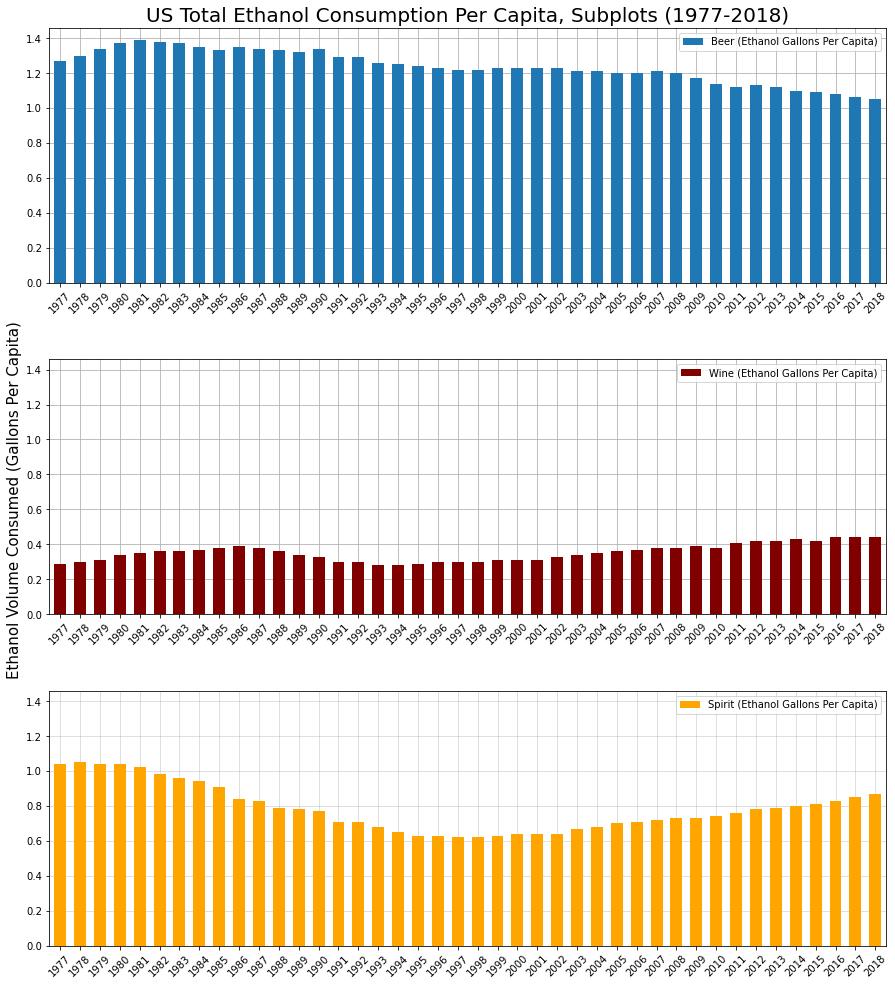

In [18]:
title_ax2 = 'US Total Ethanol Consumption Per Capita, Subplots (1977-2018)'

# Subplot
ax2 = us_totals_df[type_gallons].plot.bar(subplots=True, align='center', width=0.6, color=color, grid=True, rot=45,
                                          sharex=False, sharey=True, figsize=(15,10), zorder=3, xlabel="")

plt.subplots_adjust(top=1.4, hspace=0.3)
ax2[0].set_title('')
ax2[1].set_title('')
ax2[2].set_title('')

# Label
plt.title(title_ax2, fontsize=20, y=3.6)
plt.ylabel('Ethanol Volume Consumed (Gallons Per Capita)', fontsize=15, y=1.75)
plt.legend(loc='best')

# Format
# plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title_ax2 + '.png', bbox_inches='tight')

plt.show()

In [19]:
beer_consumption = us_totals_df[type_gallons[0]]
# beer_consumption.head()

wine_consumption = us_totals_df[type_gallons[1]]
# wine_consumption.head()

spirit_consumption = us_totals_df[type_gallons[2]]
# spirit_consumption.head()

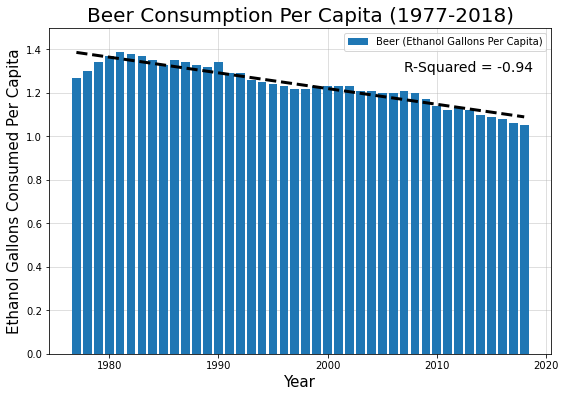

In [20]:
title = 'Beer Consumption Per Capita (1977-2018)'

# Calculate beer consumption linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, beer_consumption)
b_regress_values = years * slope + intercept
b_line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Calculate R-squared
b_corr = st.pearsonr(years, beer_consumption)
b_r_squared = round(b_corr[0], 2)

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot with linear regression
plt.bar(years, beer_consumption, zorder=3, label='Beer (Ethanol Gallons Per Capita)')
plt.plot(years, b_regress_values, 'black', zorder=3, lw=3, ls='--')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)
plt.legend(loc='best')

# Format
plt.ylim(0, 1.5)
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Annotate
plt.annotate(f'R-Squared = {b_r_squared}', (2007,1.3), color='black', fontsize=14)

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

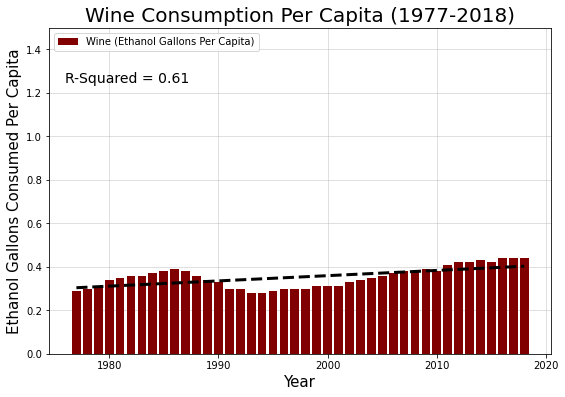

In [21]:
title = 'Wine Consumption Per Capita (1977-2018)'

# Calculate beer consumption linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, wine_consumption)
w_regress_values = years * slope + intercept
w_line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Calculate R-squared
wine_corr = st.pearsonr(years, wine_consumption)
w_r_squared = round(wine_corr[0], 2)

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot with linear regression
plt.bar(years, wine_consumption, color='maroon', zorder=3, label='Wine (Ethanol Gallons Per Capita)')
plt.plot(years, w_regress_values, 'black', zorder=3, lw=3, ls='--')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)
plt.legend(loc='upper left')

# Format
plt.ylim(0, 1.5)
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Annotate
plt.annotate(f'R-Squared = {w_r_squared}', (1976,1.25), color='black', fontsize=14)

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

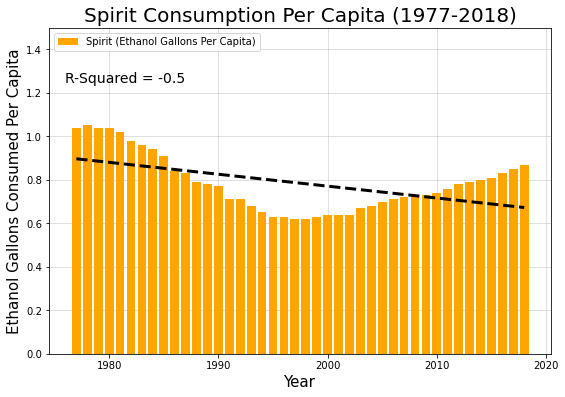

In [22]:
title = 'Spirit Consumption Per Capita (1977-2018)'

# Calculate beer consumption linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, spirit_consumption)
s_regress_values = years * slope + intercept
s_line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Calculate R-squared
spirit_corr = st.pearsonr(years, spirit_consumption)
s_r_squared = round(spirit_corr[0], 2)

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot with linear regression
plt.bar(years, spirit_consumption, color='orange', zorder=3, label='Spirit (Ethanol Gallons Per Capita)')
plt.plot(years, s_regress_values, 'black', zorder=3, lw=3, ls='--')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)
plt.legend(loc='upper left')

# Format
plt.ylim(0, 1.5)
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Annotate
plt.annotate(f'R-Squared = {s_r_squared}', (1976,1.25), color='black', fontsize=14)

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

# Regional Consumption Comparison

In [23]:
# NIAAA data additional cleaning

In [24]:
niaaa_data = pd.read_csv(niaaa_data_filepath, delimiter=",")
niaaa_data.head()

,Year (4-digit calendar year),"Geographic ID code (FIPS code, see specification below)",Type of beverage (see specification below),Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Gallons of ethanol per capita (14+),Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Gallons of ethanol per capita (21+),Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region,Type of Beverage,Source
0,1970,1,1,3863000,1738350,2499000,6956,0.6956,9,2020000,8606,0.8606,9,.,.,.,Alabama,Spirits,unknown
1,1970,1,2,1412000,225920,2499000,904,0.0904,9,2020000,1118,0.1118,9,.,.,.,Alabama,Wine,unknown
2,1970,1,3,33098000,1489410,2499000,5960,0.5960,10,2020000,7373,0.7373,10,.,.,.,Alabama,Beer,unknown
3,1970,1,4,.,3453680,2499000,13820,1.3820,10,2020000,17097,1.7097,10,.,.,.,Alabama,All beverages,unknown
4,1970,2,1,945000,425250,205000,20744,2.0744,1,165000,25773,2.5773,1,.,.,.,Alaska,Spirits,unknown


In [25]:
niaaa_df = niaaa_data[['Year (4-digit calendar year)', 
                        'State_Region', 
                        'Geographic ID code (FIPS code, see specification below)', 
                        'Type of Beverage', 
                        'Gallons of beverage', 
                        'Gallons of ethanol (absolute alcohol)', 
                        'Population (age 14 and older)', 
                        'Decile for per capita consumption age 14 and older']]

niaaa_df.head()

,Year (4-digit calendar year),State_Region,"Geographic ID code (FIPS code, see specification below)",Type of Beverage,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Decile for per capita consumption age 14 and older
0,1970,Alabama,1,Spirits,3863000,1738350,2499000,9
1,1970,Alabama,1,Wine,1412000,225920,2499000,9
2,1970,Alabama,1,Beer,33098000,1489410,2499000,10
3,1970,Alabama,1,All beverages,.,3453680,2499000,10
4,1970,Alaska,2,Spirits,945000,425250,205000,1


In [26]:
niaaa_all_bevs = niaaa_df.loc[niaaa_df['Type of Beverage']=='All beverages']
# len(list(niaaa_all_bevs['State_Region'].unique()))
niaaa_all_bevs.reset_index(inplace=True, drop=True)
niaaa_all_bevs

,Year (4-digit calendar year),State_Region,"Geographic ID code (FIPS code, see specification below)",Type of Beverage,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Decile for per capita consumption age 14 and older
0,1970,Alabama,1,All beverages,.,3453680,2499000,10
1,1970,Alaska,2,All beverages,.,742190,205000,1
2,1970,Arizona,4,All beverages,.,3473610,1272000,4
3,1970,Arkansas,5,All beverages,.,2037140,1422000,10
4,1970,California,6,All beverages,.,46020375,14811000,2
...,...,...,...,...,...,...,...,...
2740,2018,Midwest Region,92,All beverages,.,133779045,56408690,.
2741,2018,South Region,93,All beverages,.,228885832,102679896,.
2742,2018,West Region,94,All beverages,.,160326587,64146752,.
2743,2018,United States,99,All beverages,.,636897302,270449061,.


In [27]:
# Break out region data from CDC DataFrame

niaaa_regions = niaaa_all_bevs[niaaa_all_bevs['State_Region'].str.lower().isin(regions)]
niaaa_regions_df = niaaa_regions.set_index(['Year (4-digit calendar year)']).sort_index(ascending=True)

print(niaaa_regions_df.count())
niaaa_regions_df.head()

State_Region                                               196
Geographic ID code (FIPS code, see specification below)    196
Type of Beverage                                           196
Gallons of beverage                                        196
Gallons of ethanol (absolute alcohol)                      196
Population (age 14 and older)                              196
Decile for per capita consumption age 14 and older         196
dtype: int64


,State_Region,"Geographic ID code (FIPS code, see specification below)",Type of Beverage,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Decile for per capita consumption age 14 and older
Year (4-digit calendar year),,,,,,,
1970,Northeast Region,91,All beverages,.,102361915,36624000,.
1970,Midwest Region,92,All beverages,.,100348190,41237000,.
1970,South Region,93,All beverages,.,99855060,45958000,.
1970,West Region,94,All beverages,.,74437035,25577000,.
1971,Northeast Region,91,All beverages,.,105700890,37264256,.


In [28]:
ne_gallons = ne_reg['All Drinks (Ethanol Gallons Per Capita)']
mw_gallons = mw_reg['All Drinks (Ethanol Gallons Per Capita)']
s_gallons = s_reg['All Drinks (Ethanol Gallons Per Capita)']
w_gallons = w_reg['All Drinks (Ethanol Gallons Per Capita)']

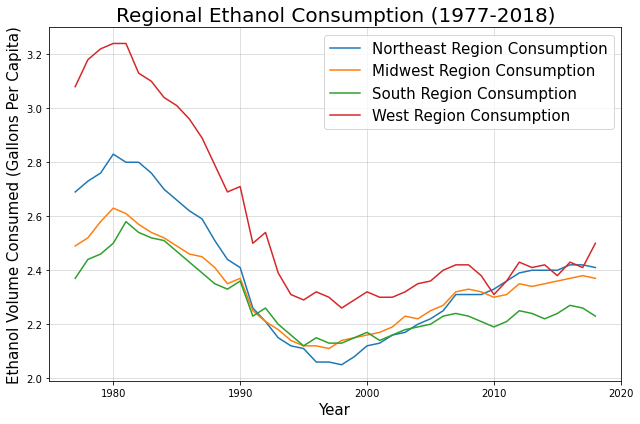

In [29]:
title = 'Regional Ethanol Consumption (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
plt.plot(years, ne_gallons, zorder=3, label='Northeast Region Consumption')
plt.plot(years, mw_gallons, zorder=3, label='Midwest Region Consumption')
plt.plot(years, s_gallons, zorder=3, label='South Region Consumption')
plt.plot(years, w_gallons, zorder=3, label='West Region Consumption')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Volume Consumed (Gallons Per Capita)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

In [30]:
niaa_regions_1977_2018 = niaaa_regions_df.loc[niaaa_regions_df.index > 1976]
niaa_regions_1977_2018.reset_index()

,Year (4-digit calendar year),State_Region,"Geographic ID code (FIPS code, see specification below)",Type of Beverage,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Decile for per capita consumption age 14 and older
0,1977,Northeast Region,91,All beverages,.,105079017,39042220,.
1,1977,Midwest Region,92,All beverages,.,112584909,45295834,.
2,1977,South Region,93,All beverages,.,132096279,55622462,.
3,1977,West Region,94,All beverages,.,96560505,31381027,.
4,1978,Northeast Region,91,All beverages,.,107058951,39261844,.
...,...,...,...,...,...,...,...,...
163,2017,West Region,94,All beverages,.,152737327,63443260,.
164,2018,Northeast Region,91,All beverages,.,113905837,47213723,.
165,2018,Midwest Region,92,All beverages,.,133779045,56408690,.
166,2018,South Region,93,All beverages,.,228885832,102679896,.


In [31]:
ne_reg = niaa_regions_1977_2018.loc[niaa_regions_1977_2018['State_Region'] == 'Northeast Region']
ne_reg_pop = ne_reg['Population (age 14 and older)']

mw_reg = niaa_regions_1977_2018.loc[niaa_regions_1977_2018['State_Region'] == 'Midwest Region']
mw_reg_pop = mw_reg['Population (age 14 and older)']

s_reg = niaa_regions_1977_2018.loc[niaa_regions_1977_2018['State_Region'] == 'South Region']
s_reg_pop = s_reg['Population (age 14 and older)']

w_reg = niaa_regions_1977_2018.loc[niaa_regions_1977_2018['State_Region'] == 'West Region']
w_reg_pop = w_reg['Population (age 14 and older)']

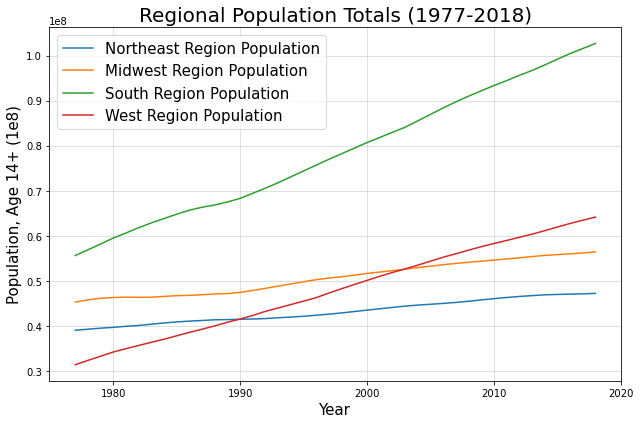

In [32]:
title = 'Regional Population Totals (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

x = niaa_regions_1977_2018.index.unique()

# Plot
plt.plot(x, ne_reg_pop, zorder=3, label='Northeast Region Population')
plt.plot(x, mw_reg_pop, zorder=3, label='Midwest Region Population')
plt.plot(x, s_reg_pop, zorder=3, label='South Region Population')
plt.plot(x, w_reg_pop, zorder=3, label='West Region Population')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population, Age 14+ (1e8)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save above plotted figure as .png
plt.savefig('Images/JL - ' + title + '.png', bbox_inches='tight')

plt.show()

In [33]:
# CDC data cleaning

In [34]:
cdc_1990_1999_age_data = pd.read_csv(raw_data_filepath1, delimiter=",")
cdc_age_by_state1 = cdc_1990_1999_age_data.drop(labels=['Notes'], axis=1)
cdc_age_1990_1999 = cdc_age_by_state1.dropna()
cdc_age_1990_1999.head()

,State,State Code,Yearly July 1st Estimates,Yearly July 1st Estimates Code,Age,Age Code,Population
0,Alabama,1.0,1990.0,1990.0,14 years,14,57097.0
1,Alabama,1.0,1990.0,1990.0,15 years,15,59484.0
2,Alabama,1.0,1990.0,1990.0,16 years,16,58734.0
3,Alabama,1.0,1990.0,1990.0,17 years,17,62646.0
4,Alabama,1.0,1990.0,1990.0,18 years,18,65346.0


In [35]:
cdc_2000_2009_age_data = pd.read_csv(raw_data_filepath2, delimiter=",")
cdc_age_by_state2 = cdc_2000_2009_age_data.drop(labels=['Notes'], axis=1)
cdc_age_2000_2009 = cdc_age_by_state2.dropna()
cdc_age_2000_2009.head()

,State,State Code,Yearly July 1st Estimates,Yearly July 1st Estimates Code,Age,Age Code,Population
0,Alabama,1.0,2000.0,2000.0,14 years,14,63845.0
1,Alabama,1.0,2000.0,2000.0,15 years,15,64606.0
2,Alabama,1.0,2000.0,2000.0,16 years,16,63734.0
3,Alabama,1.0,2000.0,2000.0,17 years,17,64198.0
4,Alabama,1.0,2000.0,2000.0,18 years,18,65305.0


In [36]:
cdc_2010_2019_age_data = pd.read_csv(raw_data_filepath3, delimiter=",")
cdc_age_by_state3 = cdc_2010_2019_age_data.drop(labels=['Notes'], axis=1)
cdc_age_2010_2019 = cdc_age_by_state3.dropna()
cdc_age_2010_2019.head()

,State,State Code,Yearly July 1st Estimates,Yearly July 1st Estimates Code,Age,Age Code,Population
0,Alabama,1.0,2010.0,2010.0,14 years,14,63343.0
1,Alabama,1.0,2010.0,2010.0,15 years,15,64836.0
2,Alabama,1.0,2010.0,2010.0,16 years,16,66537.0
3,Alabama,1.0,2010.0,2010.0,17 years,17,67437.0
4,Alabama,1.0,2010.0,2010.0,18 years,18,69413.0


In [37]:
# Store columns for merge 'on='
columns = list(cdc_age_1990_1999.columns)
columns

['State',
 'State Code',
 'Yearly July 1st Estimates',
 'Yearly July 1st Estimates Code',
 'Age',
 'Age Code',
 'Population']

In [38]:
cdc_age_1990_2009 = cdc_age_1990_1999.merge(cdc_age_2000_2009, how='outer', on=columns)
cdc_age_1990_2009.head()

,State,State Code,Yearly July 1st Estimates,Yearly July 1st Estimates Code,Age,Age Code,Population
0,Alabama,1.0,1990.0,1990.0,14 years,14,57097.0
1,Alabama,1.0,1990.0,1990.0,15 years,15,59484.0
2,Alabama,1.0,1990.0,1990.0,16 years,16,58734.0
3,Alabama,1.0,1990.0,1990.0,17 years,17,62646.0
4,Alabama,1.0,1990.0,1990.0,18 years,18,65346.0


In [39]:
cdc_age_1990_2019 = cdc_age_1990_2009.merge(cdc_age_2010_2019, how='outer', on=columns)
cdc_age_1990_2019['Yearly July 1st Estimates'] = cdc_age_1990_2019['Yearly July 1st Estimates'].astype(int)
cdc_age_1990_2019['Yearly July 1st Estimates Code'] = cdc_age_1990_2019['Yearly July 1st Estimates Code'].astype(int)
cdc_age_1990_2019

,State,State Code,Yearly July 1st Estimates,Yearly July 1st Estimates Code,Age,Age Code,Population
0,Alabama,1.0,1990,1990,14 years,14,57097.0
1,Alabama,1.0,1990,1990,15 years,15,59484.0
2,Alabama,1.0,1990,1990,16 years,16,58734.0
3,Alabama,1.0,1990,1990,17 years,17,62646.0
4,Alabama,1.0,1990,1990,18 years,18,65346.0
...,...,...,...,...,...,...,...
110155,Wyoming,56.0,2019,2019,81 years,81,2307.0
110156,Wyoming,56.0,2019,2019,82 years,82,2135.0
110157,Wyoming,56.0,2019,2019,83 years,83,1898.0
110158,Wyoming,56.0,2019,2019,84 years,84,1757.0


In [40]:
# OUTPUT MERGED DATA TO CSV
output_data_path = "../data_clean/cdc_population_estimates_1990_2019_merged.csv"
# cdc_age_1990_2019.to_csv(output_data_path)

In [41]:
# Rename state names as lowercase to match niaaa/per capita data
cdc_age_1990_2019['State'] = cdc_age_1990_2019['State'].str.lower()
cdc_age_1990_2019

,State,State Code,Yearly July 1st Estimates,Yearly July 1st Estimates Code,Age,Age Code,Population
0,alabama,1.0,1990,1990,14 years,14,57097.0
1,alabama,1.0,1990,1990,15 years,15,59484.0
2,alabama,1.0,1990,1990,16 years,16,58734.0
3,alabama,1.0,1990,1990,17 years,17,62646.0
4,alabama,1.0,1990,1990,18 years,18,65346.0
...,...,...,...,...,...,...,...
110155,wyoming,56.0,2019,2019,81 years,81,2307.0
110156,wyoming,56.0,2019,2019,82 years,82,2135.0
110157,wyoming,56.0,2019,2019,83 years,83,1898.0
110158,wyoming,56.0,2019,2019,84 years,84,1757.0


# Age Trends

In [42]:
age_codes = cdc_age_1990_2019['Age Code']

print(f'Age Code count: {age_codes.nunique()}')
print(f'Min Age Code: {age_codes.min()}')
print(f'Max Age Code: {age_codes.max()}')
print('-------------------')
print(f'dtypes: {cdc_age_1990_2019.dtypes}')

Age Code count: 72
Min Age Code: 14
Max Age Code: 85+
-------------------
dtypes: State                              object
State Code                        float64
Yearly July 1st Estimates           int32
Yearly July 1st Estimates Code      int32
Age                                object
Age Code                           object
Population                        float64
dtype: object


In [43]:
cdc_groupby_age = cdc_age_1990_2019.groupby(['Yearly July 1st Estimates', 'Age Code']).sum('Population').reset_index()
cdc_age_pop_df = cdc_groupby_age.drop(columns=['State Code', 'Yearly July 1st Estimates Code'])
cdc_age_pop_df.head()

,Yearly July 1st Estimates,Age Code,Population
0,1990,14,3259038.0
1,1990,15,3346796.0
2,1990,16,3286594.0
3,1990,17,3439042.0
4,1990,18,3599611.0


In [44]:
cdc_years = cdc_age_pop_df['Yearly July 1st Estimates']
cdc_ages = cdc_age_pop_df['Age Code']
cdc_pop = cdc_age_pop_df['Population']

In [45]:
cdc_year_totals = cdc_age_pop_df.groupby('Yearly July 1st Estimates').sum('Population')
cdc_year_total_pop = cdc_year_totals
cdc_year_total_pop['Total Population'] = cdc_year_total_pop
cdc_year_total_pop

,Population,Total Population
Yearly July 1st Estimates,,
1990,198735772.0,198735772.0
1991,201163781.0,201163781.0
1992,203787619.0,203787619.0
1993,206429677.0,206429677.0
1994,209133071.0,209133071.0
1995,211828626.0,211828626.0
1996,214612873.0,214612873.0
1997,217500826.0,217500826.0
1998,220254922.0,220254922.0


In [46]:
print(cdc_pop.sum())
print(cdc_year_total_pop.sum())

7110175244.0
Population          7.110175e+09
Total Population    7.110175e+09
dtype: float64


In [47]:
cdc_merged = cdc_age_pop_df.merge(cdc_year_total_pop, on='Yearly July 1st Estimates')
cdc_merged_df = cdc_merged[['Yearly July 1st Estimates', 'Age Code', 'Population_x', 'Total Population']]
cdc_merged_df

,Yearly July 1st Estimates,Age Code,Population_x,Total Population
0,1990,14,3259038.0,198735772.0
1,1990,15,3346796.0,198735772.0
2,1990,16,3286594.0,198735772.0
3,1990,17,3439042.0,198735772.0
4,1990,18,3599611.0,198735772.0
...,...,...,...,...
2155,2019,81,1381641.0,271833136.0
2156,2019,82,1241341.0,271833136.0
2157,2019,83,1151190.0,271833136.0
2158,2019,84,1067757.0,271833136.0
